<a href="https://www.kaggle.com/code/fotimakhongulomova/pytorch-workflow-exercises?scriptVersionId=184027313" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'2.1.2'

### Create a straight line dataset

In [2]:
weights = 0.3
bias = 0.9

start = 0 
end = 2
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X + bias

len(X), len(y)

(100, 100)

In [3]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

### Spliting data into training and test sets

In [4]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

### Plot the training and testing data

In [5]:
def plot(train_data=X_train, train_labels=y_train,
         test_data=X_test, test_labels=y_test, predictions=None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, test_labels, c='r', s=4, label="Training data")
    
    plt.legend(prop={"size": 14});

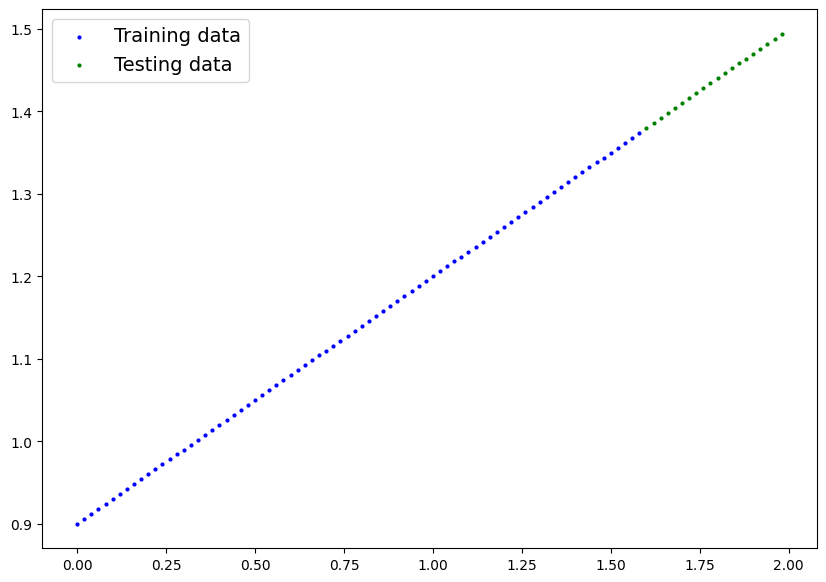

In [6]:
plot();

### Build a PyTorch model

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### Train model

In [8]:
model = LinearRegressionModel()

loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [9]:
torch.manual_seed(42)

epochs = 160

for epoch in range(epochs):
    model.train()
    
    # 1. Forwand pass 
    y_pred = model(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    print(loss)
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()
    
    # Testing
    model.eval()
    
    if epoch % 20 == 0:
        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_fn(test_pred, y_test)
    
        
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

        # Print out model state_dict()
        print(model.state_dict())

tensor(1.8728, grad_fn=<MeanBackward0>)
Epoch: 0 | Loss: 1.8728485107421875 | Test Loss: 1.9817259311676025
OrderedDict([('weights', tensor([0.1732])), ('bias', tensor([-0.8548]))])
tensor(1.8549, grad_fn=<MeanBackward0>)
tensor(1.8370, grad_fn=<MeanBackward0>)
tensor(1.8191, grad_fn=<MeanBackward0>)
tensor(1.8012, grad_fn=<MeanBackward0>)
tensor(1.7833, grad_fn=<MeanBackward0>)
tensor(1.7654, grad_fn=<MeanBackward0>)
tensor(1.7475, grad_fn=<MeanBackward0>)
tensor(1.7296, grad_fn=<MeanBackward0>)
tensor(1.7117, grad_fn=<MeanBackward0>)
tensor(1.6938, grad_fn=<MeanBackward0>)
tensor(1.6759, grad_fn=<MeanBackward0>)
tensor(1.6580, grad_fn=<MeanBackward0>)
tensor(1.6401, grad_fn=<MeanBackward0>)
tensor(1.6222, grad_fn=<MeanBackward0>)
tensor(1.6043, grad_fn=<MeanBackward0>)
tensor(1.5864, grad_fn=<MeanBackward0>)
tensor(1.5685, grad_fn=<MeanBackward0>)
tensor(1.5506, grad_fn=<MeanBackward0>)
tensor(1.5327, grad_fn=<MeanBackward0>)
tensor(1.5148, grad_fn=<MeanBackward0>)
Epoch: 20 | Loss: 

In [10]:
with torch.inference_mode():
    y_preds_new = model(X_test)

In [11]:
model.state_dict()

OrderedDict([('weights', tensor([0.9278])), ('bias', tensor([0.2859]))])

In [12]:
weights, bias

(0.3, 0.9)

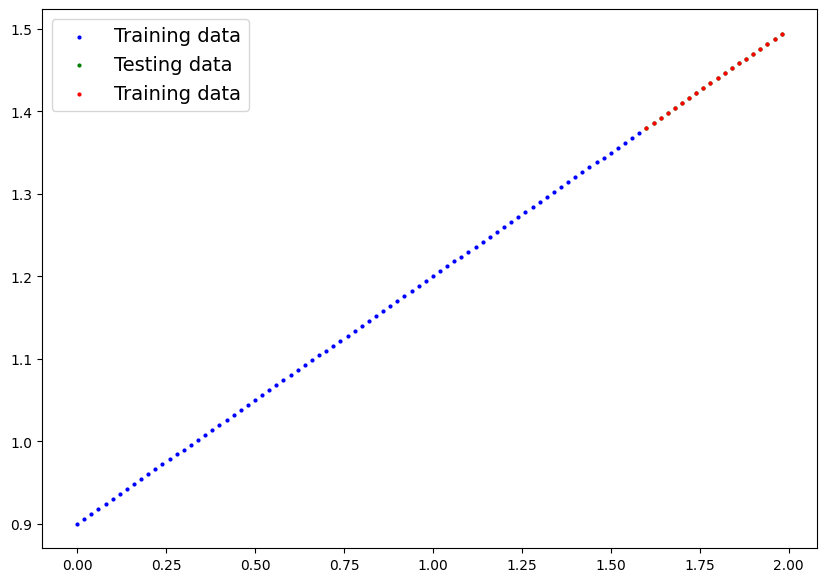

In [13]:
plot(predictions=y_preds_new)